# Exercise 5: Using ggplot

This homework assignment is designed to get you comfortable working with `ggplot` for generating data visualizations.

We will be using the [gapminder](https://cran.r-project.org/web/packages/gapminder/index.html) dataset. It contains  information about population, life expectancy and per capita GDP by country over time.

---
# 1. Color, plot type and layers (6 points)

Install and load the `gapminder` dataset. Look at the first few rows of the data frame.

In [34]:
#install.packages("gapminder")
library(gapminder)
head(gapminder)
#install.packages("tidyverse")
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


Now, let's create a basic scatterplot using `ggplot2` that shows how life expectancy has changed over time.

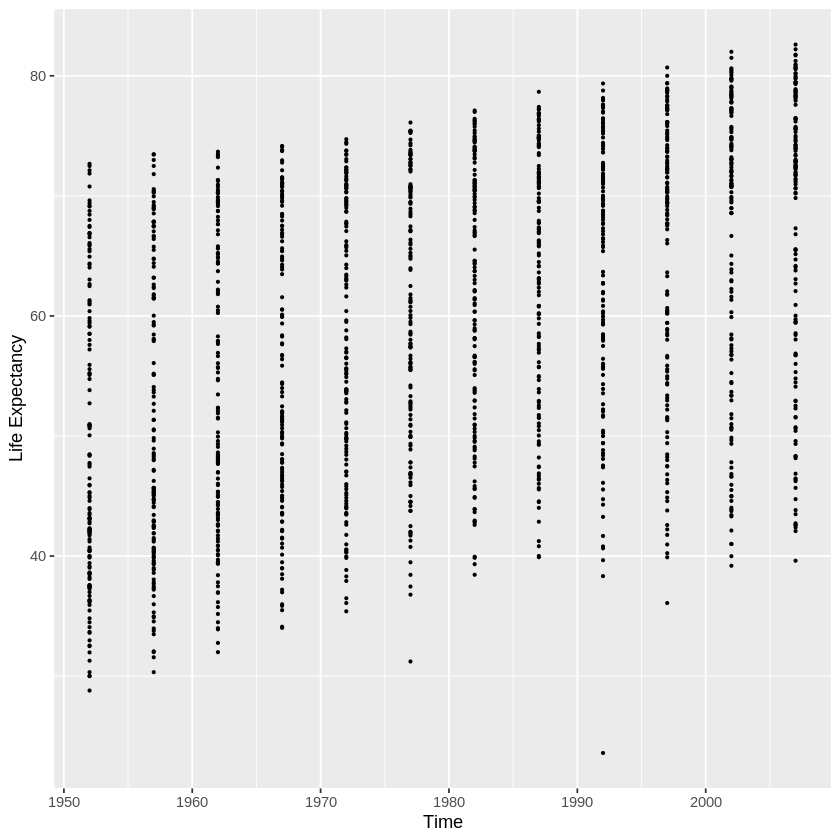

In [35]:
options(repr.plot.width=7, repr.plot.height=7) 
ggplot(gapminder, aes(x=year, y=lifeExp)) +
    geom_point(size=0.5) +
    scale_x_continuous(name = 'Time') +
    scale_y_continuous(name = 'Life Expectancy')

We can add another layer of detail by using color to indicate continent. Modify the code from the previous question to to do so. 

What trends can you identify in the data? 

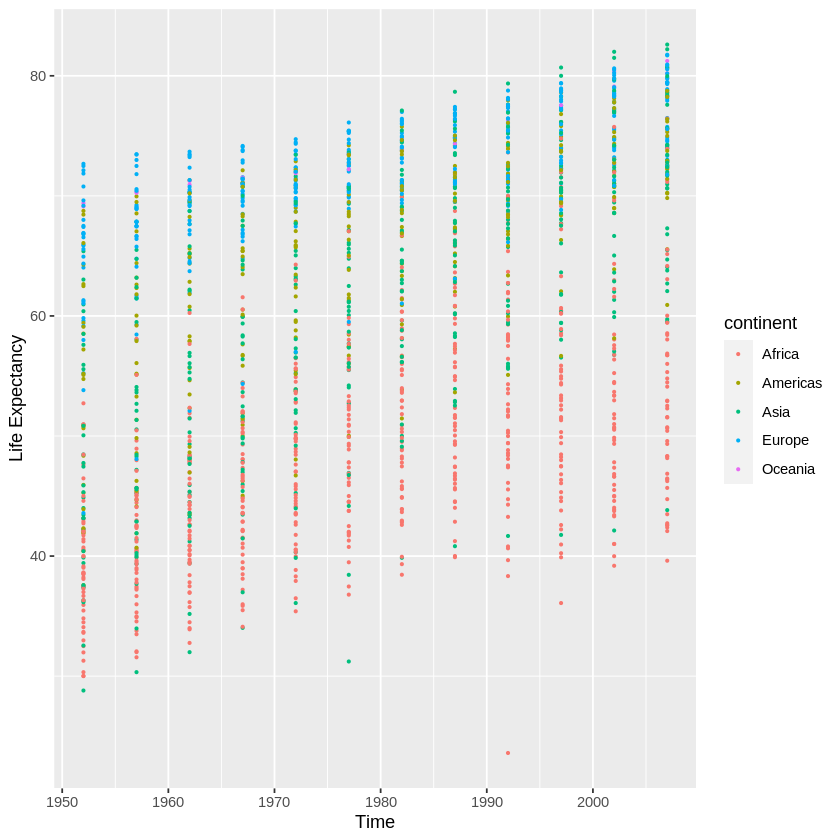

In [36]:
ggplot(gapminder, aes(x=year, y=lifeExp, color=continent)) +
    geom_point(size=0.5) +
    scale_x_continuous(name = 'Time') +
    scale_y_continuous(name = 'Life Expectancy')

> *Write your response here.*
> * The general trend seems to indicate an increased life expectancy over the years. Continents with stronger economies tend to have longer life expectancies. We can see that Europe, Asia, and the Americas overall have higher life expectancy compared to Africa. Oceania has fewer data points.

Using a scatterplot probably isn’t the best type of plot for effectively visualizing change over time. Instead, modify the code from the previous question to create a line plot. 

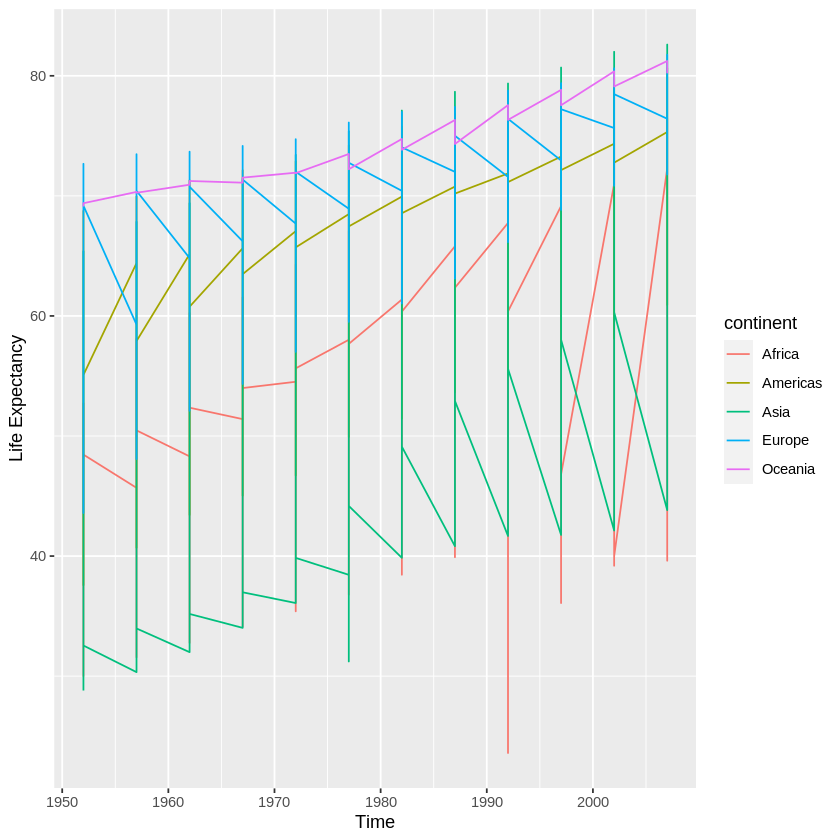

In [37]:
ggplot(gapminder, aes(x=year, y=lifeExp, color=continent)) +
    geom_line() +
    scale_x_continuous(name = 'Time') +
    scale_y_continuous(name = 'Life Expectancy')

Hmm, this plot looks a bit weird and unexpected, making it difficult for us to easily interpret the data trends. What is causing this?

> *Write your response here.*
> * The line seems to be jumping around a lot in each continent.The geom_line() is connecting the length-wise data points as well as across each year grouping (e.g., 1950 to 1960). Time points and continents are not binned. 

Now, let’s try to separate the data by country, plotting one line for each country. Modify the code from the previous plot to do so.

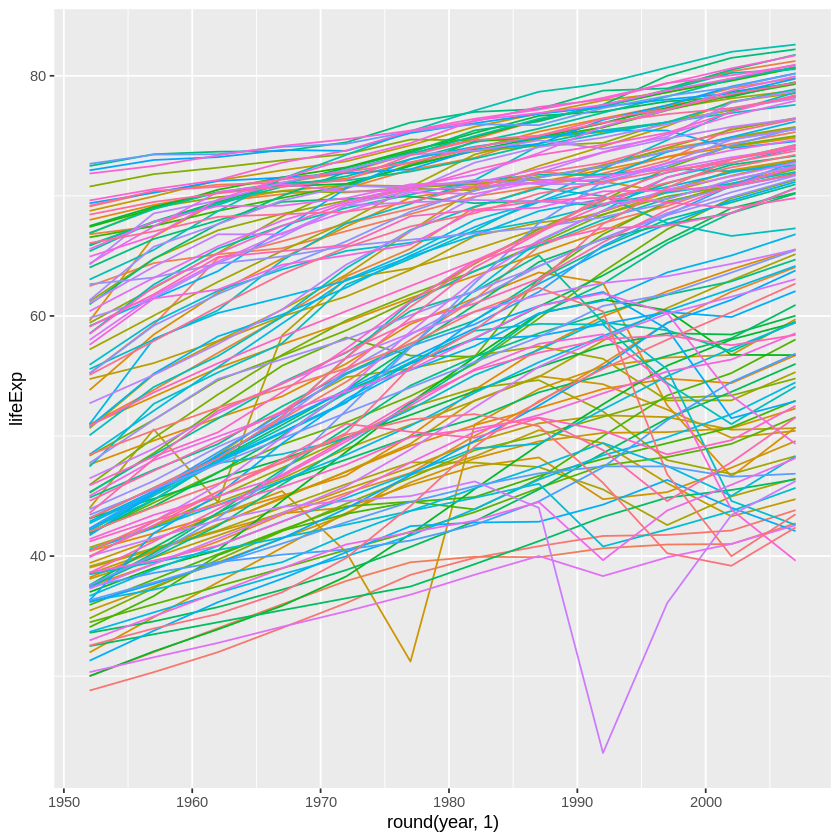

In [38]:
ggplot(gapminder, aes(x=round(year,1), y=lifeExp, color=country)) +
    stat_summary(geom='line',fun=mean) + theme(legend.position="none")

But what if we want to visualize both lines and points on our graph? There are two primary ways to do this - taking advantage of what we know about using layers for ggplot (each layer is drawn on top of the previous layer). 

* Method 1: Plot black points on top of the colorful lines
* Method 2: Plot black points underneath the colorful lines

Modify the code from the previous question to create two plots, one for each method.

*Hint: to control the color of the points, think about where the aesthetic color attribute should be located e.g., in the global plot options or in a specific layer.*

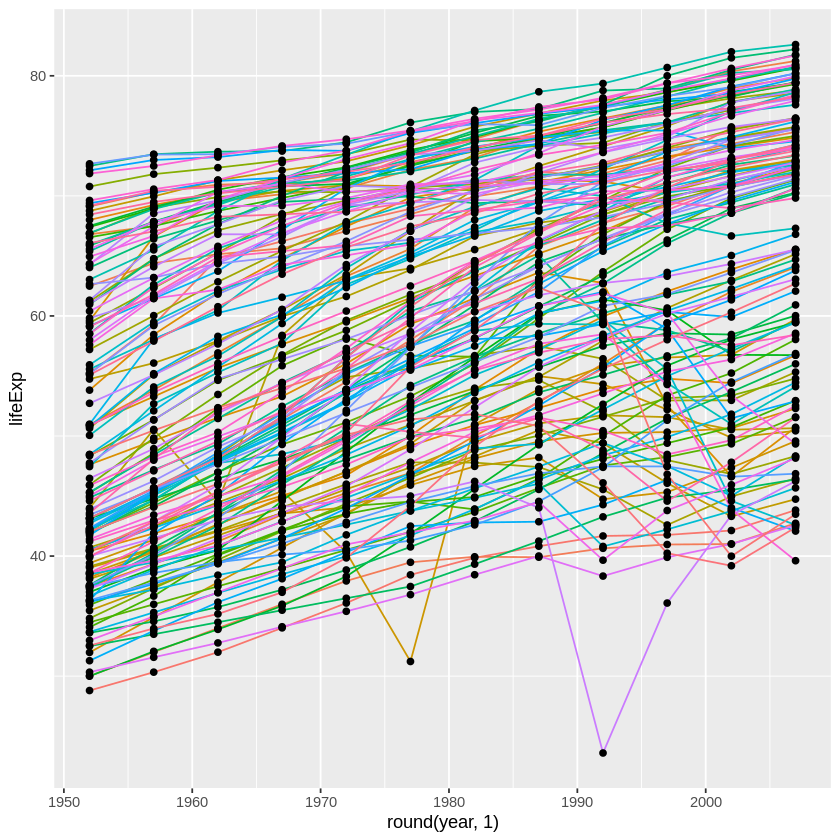

In [39]:
ggplot(gapminder, aes(x=round(year,1), y=lifeExp, color=country)) +
  geom_line() +
  geom_point(colour="black") +
  theme(legend.position="none")

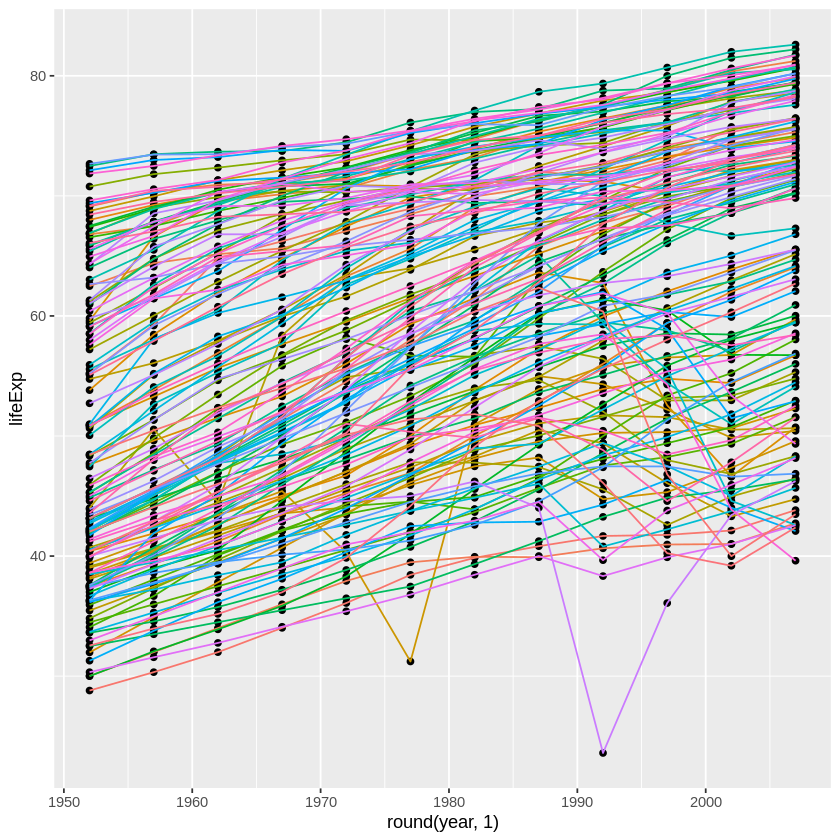

In [40]:
ggplot(gapminder, aes(x=round(year,1), y=lifeExp, color=country)) +
  geom_point(colour="black") +
  geom_line() +
  theme(legend.position="none")

In [ ]:
# Aside: colorful points

---
# 2. Adding statistics (4 points)

`ggplot2` allows easy overlay of statistical models on top of the data. 

The graph below shows the relationship between life expectency and GDP per capita:

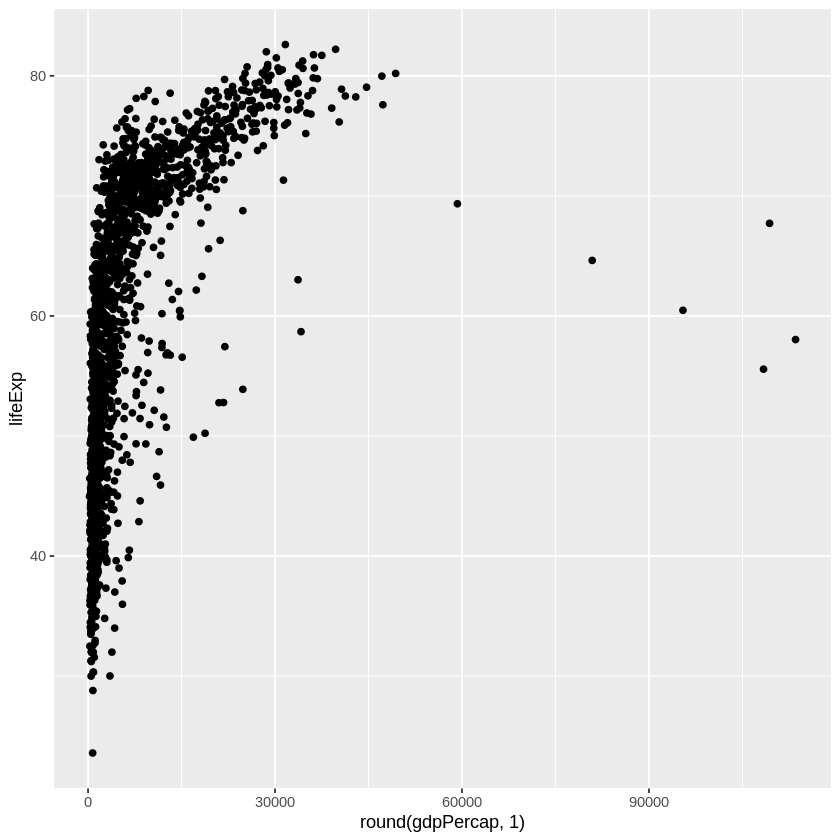

In [42]:
ggplot(gapminder, aes(x=round(gdpPercap,1), y=lifeExp)) +
    geom_point(colour="black") +
    theme(legend.position="none")

However, the data points are squished close together on the left side of the graph, so it's hard to see the actual relationship we're interested in.

To fix this, we can change the scale of x-axis units using the scale functions. We can also make the data points transparent using the alpha function. This is helpful when there is a large amount of clustered data.

Modify the code above to incorporate these two changes (scale and transparency).

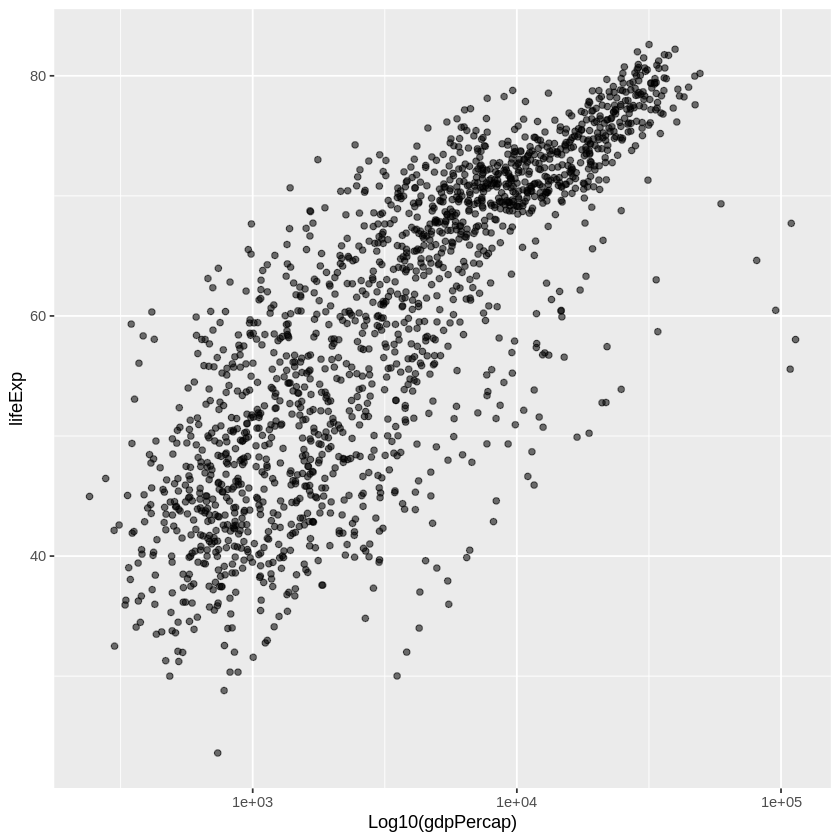

In [44]:
ggplot(gapminder, aes(x=round(gdpPercap,1), y=lifeExp, alpha=.25)) +
    geom_point(colour="black") +
    scale_x_continuous(trans = "log10",
    name = "Log10(gdpPercap)") +
    theme(legend.position="none")

Already we can more easily visualize the trend in the data. 

Next, let's overlay statistics by fiting a simple relationship to the data. Modify the code from the previous question by adding a `geom_smooth` layer.

`geom_smooth()` using formula = 'y ~ x'


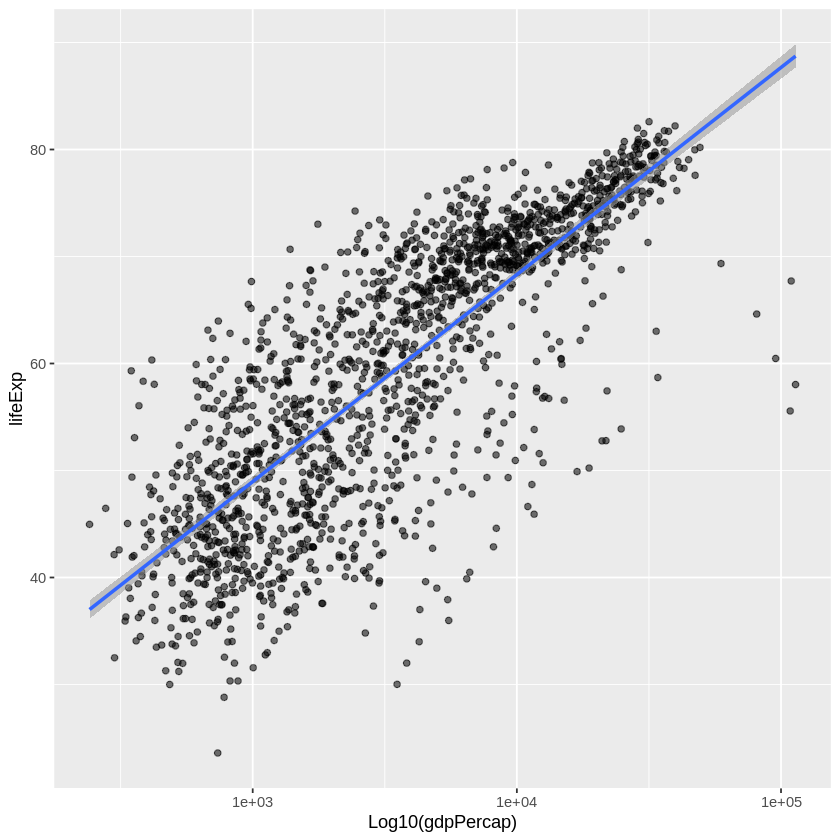

In [45]:
ggplot(gapminder, aes(x=round(gdpPercap,1), y=lifeExp, alpha=.25)) +
    geom_point(colour="black") +
    scale_x_continuous(trans = "log10",
    name = "Log10(gdpPercap)") +
    geom_smooth(method = "lm") +
    theme(legend.position="none")

Again, we can add a layer of detail by introducing separate colors for each continent. We can also create individual trendlines for each continent, instead of only one trendline.

Modify the code from the previous question to add these elements. 


`geom_smooth()` using formula = 'y ~ x'


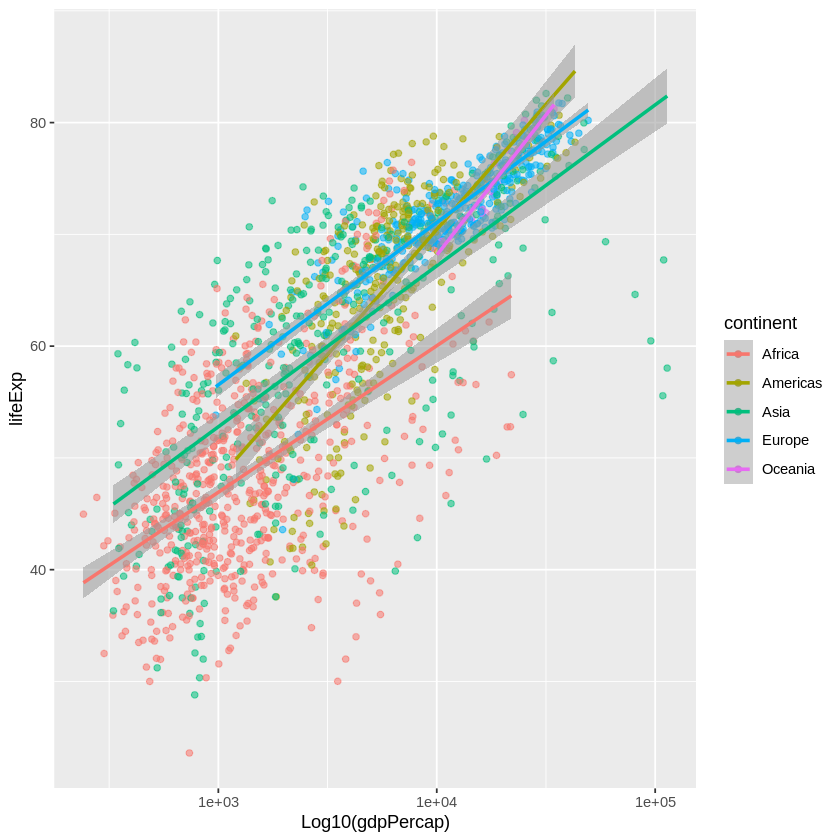

In [47]:
ggplot(gapminder, aes(x=round(gdpPercap,1), y=lifeExp, alpha=.25, colour=continent)) +
    geom_point() +
    scale_x_continuous(trans = "log10",
    name = "Log10(gdpPercap)") +
    geom_smooth(method = "lm") +
    scale_alpha(guide='none')

When you are finished, save the notebook as Exercise5.ipynb, push it to your class GitHub repository and send the instructors a link to your notebook via Canvas. 

**DUE:** 5pm EST, Feb 15, 2023

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Sara Jaramillo*